# Hackathon Stat

This project illustrates the course LEPL1109 with an industrial application of statistics. You will analyse the capacity of solar production of electricity located in the French cities of Caen and Tours.
The file 'radiation.csv' contains 3 columns 
DATE           : YYYYMMDD,
Caen and Tours : the daily solar radiation in W/m2 measured in the 2 cities. 
Notice that data for some days are not reported due to failure of measurement system.

## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1:

Part. 2:

Part. 3:

Part. 4:

---
## 1. Energy calculation and basic statistics

Compute the daily energy in WH per square meter of solar panel. For this purpose you use the datasets reporting the solar irradation measure in Caen and Tours (source https://www.ecad.eu/). The irradiation is measured in W/m2 per day. You will use the formula:

C = E_Sol x 24 x P_cr x f_perf

where  

C is the electricity produced in WH/m2 for a day

E_sol is the daily solar radiation in W/m2 

P_cr is the peak power coefficient, set here to  0.18 (monocristal silicium)

f_perf depends upon the system, set here to 0.75.

Remark:

1 W = 1 J/sec

1 WH  is 1W x 3600sec = 3600J

energy/m2 = E_sol * 24 * 3600 J/m2 = E_sol * 24 WH/m2

---
1.1. Start by computing the daily energy in WH produced by a 1m2 solar panel

a. Plot time-series of solar electric production in Caen and Tours from 1974 to 2023. Comment the evolution.

b. Plot boxplots of daily productions for both cities. Comment the box plot.

c. Remove outliers using the interquartile range. 

d. Plot an histogram of daily electricity production, after removal of outliers.

Watchout: remove all days for which a outlier is observed in Caen **or** Tours to keep the same number of observations.


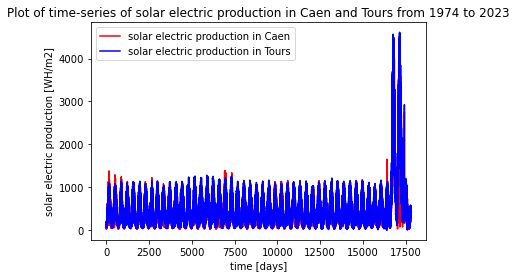

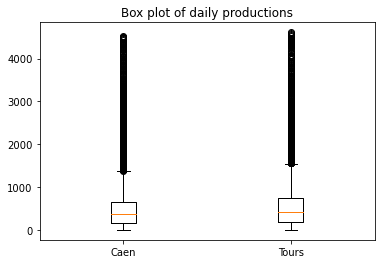

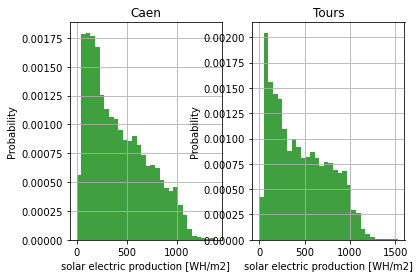

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Radiation.csv",sep=',' )
# 1.1
dates = data['DATE'].values
E_sol_caen = data['Caen'].values
E_sol_tours = data['Tours'].values

P_cr = 0.18
f_perf = 0.75

C_caen = E_sol_caen * 24 * P_cr * f_perf
C_tours = E_sol_tours * 24 * P_cr * f_perf
day = np.arange(dates.size)
year = np.linspace(1974, 2023, dates.size)
#a
plt.figure()
plt.title("Plot of time-series of solar electric production in Caen and Tours from 1974 to 2023")
plt.plot(day, C_caen, '-r', label = "solar electric production in Caen")
plt.plot(day, C_tours, '-b', label = "solar electric production in Tours")
plt.ylabel("solar electric production [WH/m2]")
plt.xlabel("time [days]")
plt.legend()
#b
plt.figure()
datn = np.column_stack([C_caen, C_tours])
plt.boxplot(datn,labels=['Caen', 'Tours'])
plt.title('Box plot of daily productions')
#c
q_caen_25 = np.quantile(C_caen, 0.25)
q_caen_75 = np.quantile(C_caen, 0.75)
iqr_caen = q_caen_75 - q_caen_25

q_tours_25 = np.quantile(C_tours, 0.25)
q_tours_75 = np.quantile(C_tours, 0.75)
iqr_tours = q_tours_75 - q_tours_25

outliers = ((C_caen > q_caen_25 - 1.5 * iqr_caen) & (C_caen < q_caen_75 + 1.5 * iqr_caen)) & ((C_tours > q_tours_25 - 1.5 * iqr_tours) & (C_tours < q_tours_75 + 1.5 * iqr_tours))
C_caen = C_caen[outliers]
C_tours = C_tours[outliers]
dates = dates[outliers]
#C_caen_without_outliers = C_caen[(C_caen > q_caen_25 - 1.5 * iqr_caen) & (C_caen < q_caen_75 + 1.5 * iqr_caen)]
#C_tours_without_outliers = C_tours[(C_tours > q_tours_25 - 1.5 * iqr_tours) & (C_tours < q_tours_75 + 1.5 * iqr_tours)]

#d
plt.figure()
plt.subplot(121)
n, bins, patches = plt.hist(C_caen, 30, density=1,facecolor='g', alpha=0.75)
plt.xlabel("solar electric production [WH/m2]")
plt.ylabel('Probability')
plt.title('Caen')
plt.grid(True)
plt.subplot(122)
n, bins, patches = plt.hist(C_tours, 30, density=1,facecolor='g', alpha=0.75)
plt.xlabel("solar electric production [WH/m2]")
plt.ylabel('Probability')
plt.title('Tours')
plt.grid(True)


plt.show()

---
1.2. We want to compute monthly statistics of electricity solar production. Calculate for each city and for each month: 

1) the average daily production of electricity in Wh/m2

2) the median daily production of electricity in Wh/m2

3) the standard deviation daily production of electricity in Wh/m2

4) the 5% percentile of daily production of electricity in Wh/m2

5) the 95% percentile of daily production of electricity in Wh/m2

Report the results in one or two tables. 

Compare and comment these statistics!

In [2]:

day = np.array((dates) % 100, dtype = int)
month = np.array(((dates - day)/100)%100, dtype = int)
year = np.array(((dates - day)/100 - month)/100, dtype = int)
dates_t = np.column_stack((year, month, day))

amdp_C_caen = np.zeros((12, 5))
amdp_C_tours = np.zeros((12, 5))

for i in range(12) :
    a = month == i + 1
    amdp_C_caen[i][0] = np.mean(C_caen[a])
    amdp_C_tours[i][0] = np.mean(C_tours[a])
    amdp_C_caen[i][1] = np.median(C_caen[a])
    amdp_C_tours[i][1] = np.median(C_tours[a])
    amdp_C_caen[i][2] = np.std(C_caen[a])
    amdp_C_tours[i][2] = np.std(C_tours[a])
    amdp_C_caen[i][3] = np.percentile(C_caen[a], 5)
    amdp_C_tours[i][3] = np.percentile(C_tours[a], 5)
    amdp_C_caen[i][4] = np.percentile(C_caen[a], 95)
    amdp_C_tours[i][4] = np.percentile(C_tours[a], 95)
#print(amdp_C_caen)
#print(amdp_C_tours)
print("Month\taverage\t\tmedian\t\tstand dev\tpercentile 5%\tpercentile 95%")
for i in range(12) :
    print(i,end="")
    for j in range(5) :
        print("\t" + str(round(amdp_C_caen[i][j],2)) + "-" + str(round(amdp_C_tours[i][j],2)),end="")
    print("")



Month	average		median		stand dev	percentile 5%	percentile 95%
0	146.88-158.13	123.12-123.12	113.12-134.64	42.12-45.36	304.56-332.42
1	250.5-273.32	223.56-236.52	169.28-194.81	70.79-71.28	466.56-525.37
2	377.94-417.67	359.64-414.72	186.45-197.81	126.36-136.08	654.48-714.58
3	560.37-600.15	573.48-622.08	210.37-225.84	204.12-205.74	874.8-926.64
4	677.08-705.47	703.08-735.48	255.01-251.82	233.28-246.73	1033.56-1049.76
5	736.64-792.38	751.68-826.2	265.78-246.91	291.6-343.28	1108.08-1127.68
6	725.44-790.5	738.72-829.44	241.27-225.48	317.52-366.12	1065.96-1095.12
7	623.1-699.66	638.28-727.38	197.95-200.35	282.69-328.05	913.68-975.24
8	459.98-514.46	466.56-531.36	168.73-184.97	181.93-191.65	709.56-774.36
9	282.71-313.05	268.92-301.32	154.33-171.95	88.61-95.09	492.48-544.32
10	173.03-191.57	155.52-162.0	124.72-155.22	48.6-51.84	314.28-356.4
11	114.46-123.7	100.44-100.44	83.63-90.89	29.16-42.12	207.36-233.28


---
## 2. Fit of distributions and hypothesis tests

---
2.1. We focus on the daily production of electricity in April. Retrieve the data for month of April, in Caen and Tours. 

 1) Fit Gamma and normal distributions by log-likelihood maximization to 
    daily production of electricity during April (Caen & Tours).
    
 2) Compute the 4 log-likelihoods and select the best model for each location (justify your answer).
 
 3) Compare on the same plot the empirical, the  gamma and normal pdf (the
    empirical pdf is an histogram of frequencies).
    
 4) Why is there 3 parameters in python for the Gamma pdf whereas there
    is only 2 in the distribution seen during lectures? 

Remark : set floc to -0.001 for the gamma.fit (to avoid troubles in case of null observations)


-9737.797220230546
-9649.520623487704
-9635.884212630106
-9549.38685406591


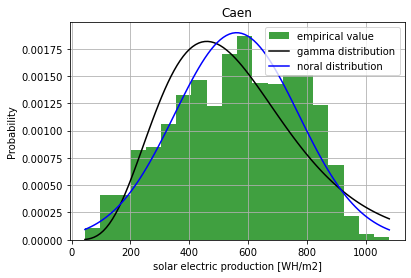

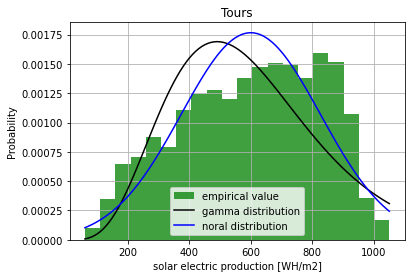

In [3]:
import scipy.stats as sc

a = month == 4
April_caen = C_caen[a]
April_tours = C_tours[a]
April_dates = dates_t[a]

gamma_parameter_caen = sc.gamma.fit(April_caen, floc=-0.001)
gamma_parameter_tours = sc.gamma.fit(April_tours, floc=-0.001)
normal_parameter_caen = sc.norm.fit(April_caen)
normal_parameter_tours = sc.norm.fit(April_tours)

def log_likelihood_gamma(data, param):
    y =  sc.gamma.logpdf(data,param[0], scale=param[2])
    return np.sum(y)

def log_likelihood_normal(data, param):
    y =  sc.norm.logpdf(data, loc=param[0], scale=param[1])
    return np.sum(y)

llg_caen = log_likelihood_gamma(April_caen, gamma_parameter_caen)
llg_tours = log_likelihood_gamma(April_tours, gamma_parameter_tours)
lln_caen = log_likelihood_normal(April_caen, normal_parameter_caen)
lln_tours = log_likelihood_normal(April_tours, normal_parameter_tours)
print(llg_tours)
print(lln_tours)
print(llg_caen)
print(lln_caen)

plt.figure()
plt.title("Caen in April")
n, bins, patches = plt.hist(April_caen, 20, density=1,facecolor='g', alpha=0.75, label="empirical value")
plt.xlabel("solar electric production [WH/m2]")
plt.ylabel('Probability')
plt.title('Caen')
plt.grid(True)
x = np.linspace(np.min(April_caen), np.max(April_caen),100)
plt.plot(x, sc.gamma.pdf(x, gamma_parameter_caen[0], scale = gamma_parameter_caen[2]), '-k', label="gamma distribution")
plt.plot(x, sc.norm.pdf(x, loc=normal_parameter_caen[0], scale = normal_parameter_caen[1]), '-b', label="noral distribution")
plt.legend()

plt.figure()
plt.title("Tours in April")
n, bins, patches = plt.hist(April_tours, 20, density=1,facecolor='g', alpha=0.75, label="empirical value")
plt.xlabel("solar electric production [WH/m2]")
plt.ylabel('Probability')
plt.title('Tours')
plt.grid(True)
x = np.linspace(np.min(April_tours), np.max(April_tours),100)
plt.plot(x, sc.gamma.pdf(x, gamma_parameter_tours[0], scale = gamma_parameter_tours[2]), '-k', label="gamma distribution")
plt.plot(x, sc.norm.pdf(x, loc=normal_parameter_tours[0], scale = normal_parameter_tours[1]), '-b', label="noral distribution")
plt.legend()

plt.show()



---

2.2. Check if the average daily production in April is the same in Caen and Tours. Let us recall that the null hypothesis is

$H_0$: $\mu_{Caen} = \mu_{Tours}$.

Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?

In [4]:
s_caen = np.sum((April_caen - np.mean(April_caen))**2)
s_tours = np.sum((April_tours - np.mean(April_tours))**2)
s_pool = np.sqrt(((April_caen.size - 1) * s_caen + (April_tours.size - 1) * s_tours)/(April_caen.size + April_tours.size - 2))
T = (np.mean(April_caen) - np.mean(April_tours))/(s_pool * np.sqrt(1/April_caen.size + 1/April_tours.size))
alpha = 50
t = sc.t(df=April_caen.size + April_tours.size - 2).ppf((alpha / 200, 1 - alpha / 200))
print(T)
print(t)
print(np.mean(April_caen) - np.mean(April_tours))
print("H_0 is " + str((T > t[0]) and (T < t[1])))


-0.12887897500530454
[-0.67457676  0.67457676]
-39.77783132530112
H_0 is True


---
2.3. Test the equality of variance of daily production in April at Caen & Tours?
$H_0$: $\sigma_{Caen}=\sigma_{Tours}$.


In [17]:
alpha = 50
T = np.sqrt(s_caen/s_tours)
F = sc.f.ppf((alpha / 200, 1 - alpha / 200), April_caen.size - 1, April_tours.size - 1)
print(T)
print(F)
print(s_caen - s_tours)
print("H_0 is " + str((T > F[0]) and (T < F[1])))


0.9314930715890013
[0.96470565 1.03658562]
-9522925.917918064
H_0 is False


---
2.4. Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

---
2.5. Apply the Wilcoxon test to distributions of daily productions in April, at Caen and Tours.  What can you conclude about the means of daily production in these 2 cities?


In [70]:
#scipy.stats.mannwhitneyu


---
## 3. Regression and forecasting 

---
3.1. Do we observe any trend in the yearly solar production of electricity over the considered period?
To answer this question: 

a. You will compute the average daily production (Wh/m2) during April from 1977 up to 2019 (included).

b. You get a time-series of 44 values for each city. Regress these values on the explanatory
variables X=(Year-1977). Don't forget to add a constant term and analyze results. 

c. Plot on the same graph, the predicted and the observed values.

d. Comment your results! 


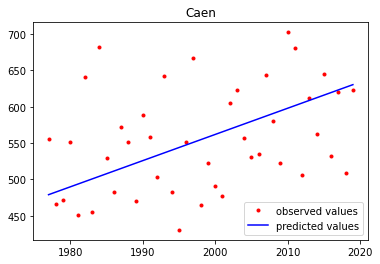

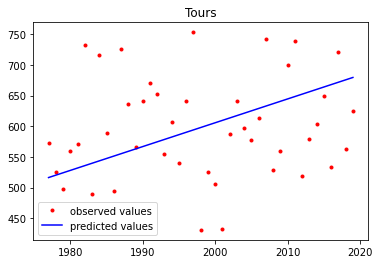

In [48]:
av_april_caen = np.zeros(2020 - 1977)
av_april_tours = np.zeros(2020 - 1977)
y = np.arange(1977, 2020, 1)
years = y - 1977
for i in  years :
    a = April_dates[:,0] == i + 1977
    av_april_caen[i] = np.mean(April_caen[a])
    av_april_tours[i] = np.mean(April_tours[a])

beta1_caen = np.sum(av_april_caen - np.mean(av_april_caen) * (years - np.mean(years))) / np.sum((years - np.mean(years))**2)
beta1_tours = np.sum(av_april_tours - np.mean(av_april_tours) * (years - np.mean(years))) / np.sum((years - np.mean(years))**2)
beta0_caen = np.mean(av_april_caen) - beta1_caen * np.mean(years)
beta0_tours = np.mean(av_april_tours) - beta1_tours * np.mean(years)

plt.figure()
plt.title("Caen")
plt.plot(y, av_april_caen, '.r', label="observed values")
plt.plot(y, beta0_caen + beta1_caen * years, '-b', label="predicted values")
plt.legend()

plt.figure()
plt.title("Tours")
plt.plot(y, av_april_tours, '.r', label="observed values")
plt.plot(y, beta0_tours + beta1_tours * years, '-b', label="predicted values")
plt.legend()


plt.show()

---
3.2. You want to design a model to forecast the solar electric production for the next day (location Caen only). You will work with data over the period 1977 to 2019. 

Let us denote by C(t) the production on day 't'. The model that we want to fit is called autoregressive and is defined as follows:

$$C(t) = \sum_{k=1}^{10} a_k C(t-k) $$

This model is common in time-series analysis and predicts the production of the next day with the  recent observations.

a. Split the dataset into a training set (1977 to 2010 included) and a validation set (2011 to 2019 included).

b.	Estimate this model with statsmodels on the training set. 

c.	How would you judge the quality of the predictive model? (Analyze statistics reported by statsmodel)

d.	Compute the Mean Absolute Error (MAE) between predicted and real consumptions (on the training set).

In [58]:
import statsmodels.api as sm

# a split
a = (year>=1977) & (year<=2010)
dates_ts = dates_t[a]
C_caen_ts = C_caen[a]
a = (year>=2011) & (year<=2019)
dates_vs = dates_t[a]
C_caen_vs = C_caen[a]
print(C_caen_ts)
# b estimate
X = np.zeros((C_caen_ts.size - 10, 10))
Y = C_caen_ts[10:]
for i in range(C_caen_ts.size - 10) :
    for j in range(10) :
        X[i][j] = C_caen_ts[i + 9 - j]
#Xm = sm.add_constant(X)
Xm = X
result = sm.OLS(Y,Xm).fit()
print(result.summary())

y_p_ts = result.predict(Xm)
MAE = np.mean(np.abs(y_p_ts - Y))
print("\nthe Mean Absolute Error (MAE) :")
print(MAE)


[171.72  48.6  145.8  ...  51.84  84.24  42.12]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.023e+04
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                        0.00
Time:                        15:50:36   Log-Likelihood:                         -80105.
No. Observations:               12285   AIC:                                  1.602e+05
Df Residuals:                   12275   BIC:                                  1.603e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      

---
3.3. Use this model on the test set to forecast the electric daily production.

a. Compare on a graph, the forecast to  real consumptions on the given period. 

b. Plot the errors of prediction. Are they acceptable?

c. Compute the MAE on the test set and the $R^2$. Is the forecast reliable?

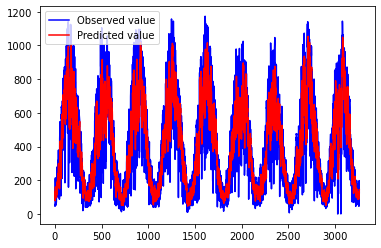

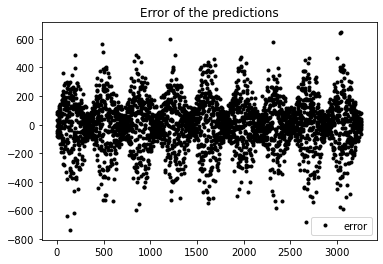


the Mean Absolute Error (MAE) :
124.15647521579464


In [64]:
X_vs = np.zeros((C_caen_vs.size - 10, 10))
Y = C_caen_vs[10:]
for i in range(C_caen_vs.size - 10) :
    for j in range(10) :
        X_vs[i][j] = C_caen_vs[i + 9 - j]

y_p_vs = result.predict(X_vs)
d = np.arange(Y.size)
plt.figure()
plt.plot(d, Y, '-b', label="Observed value")
plt.plot(d, y_p_vs, '-r', label="Predicted value")
plt.legend()

plt.figure()
plt.title("Error of the predictions")
plt.plot(d, Y - y_p_vs, '.k', label="error")
plt.legend()



plt.show()

MAE = np.mean(np.abs(y_p_vs - Y))
print("\nthe Mean Absolute Error (MAE) :")
print(MAE)

